In [2]:

import pandas as pd

# Load CSV file in chunks if it's very large
file_path = 'data/benin-malanville.csv'
chunk_size = 10000  # Number of rows per chunk
# df = pd.read_csv(file_path, low_memory=False)  # Adjust or use chunks if needed
df = pd.read_csv(file_path, parse_dates=['Timestamp'])



In [ ]:
# Preview the dataset
print(df.head())
print(df.info())

            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1 2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2 2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3 2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4 2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
<class '

In [3]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)


                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         1.600000    

 ## Data Quality Check

In [4]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)


Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64


In [5]:
# Negative values in columns that should only contain positives
columns_to_check = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'Precipitation']
for column in columns_to_check:
    print(f"Anomalies in {column}: {df[df[column] < 0].shape[0]} rows")


Anomalies in GHI: 258847 rows
Anomalies in DNI: 275987 rows
Anomalies in DHI: 259182 rows
Anomalies in WS: 0 rows
Anomalies in WSgust: 0 rows
Anomalies in Precipitation: 0 rows


In [9]:
from scipy.stats import zscore

# Calculate Z-scores for outlier detection
numerical_cols = df.select_dtypes(include='number').columns
z_scores = df[numerical_cols].apply(zscore)

# Flag data points with |Z-score| > 3
outliers = (z_scores.abs() > 3).sum()
print(f"Outliers: {outliers}")


ModuleNotFoundError: No module named 'scipy'

<Figure size 1000x600 with 0 Axes>

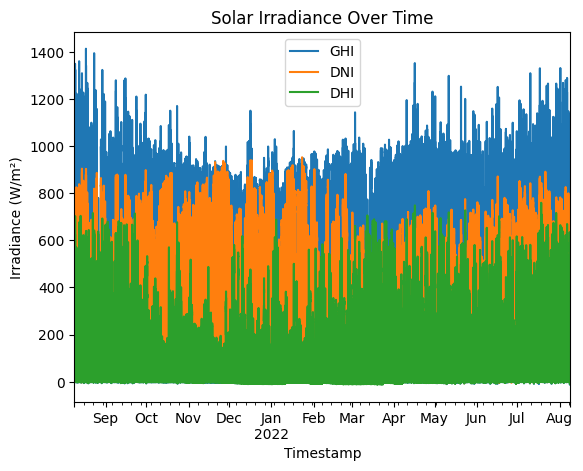

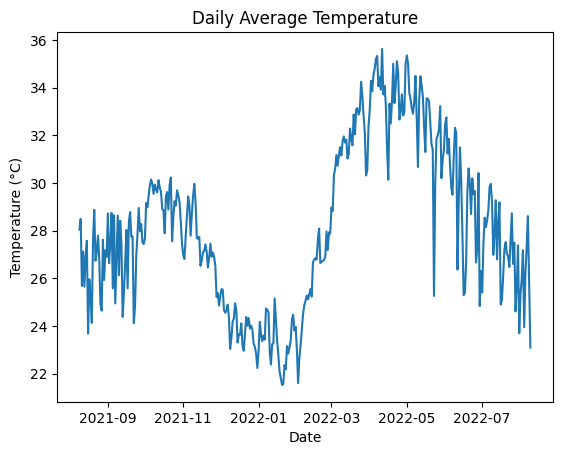

In [10]:
import matplotlib.pyplot as plt

# Plot GHI, DNI, DHI over time
plt.figure(figsize=(10, 6))
df.set_index('Timestamp')[['GHI', 'DNI', 'DHI']].plot()
plt.title('Solar Irradiance Over Time')
plt.ylabel('Irradiance (W/m²)')
plt.show()

# Daily temperature trends
df['Date'] = df['Timestamp'].dt.date
df.groupby('Date')['Tamb'].mean().plot(title='Daily Average Temperature')
plt.ylabel('Temperature (°C)')
plt.show()
